In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

## Linear regression and gradients

In [2]:
w_true = 0.1
b_true = 0.5

In [3]:
def make_data(w=w_true, b=b_true, n =100):
    x = tf.random.uniform(shape=(n,))
    noise = tf.random.normal(shape=(len(x,),), mean=0.0, stddev=0.01)
    y = w*x + b + noise
    return x.numpy(), y.numpy()

In [4]:
x, y = make_data()

In [5]:
def predict(x, w, b):
    y = w*x + b
    return y

Original data:

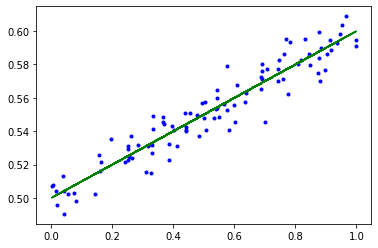

In [6]:
%matplotlib inline
plt.plot(x, y, 'b.')
plt.plot(x, predict(x, w_true, b_true), 'g')

Loss function:

In [7]:
def mse(y_hat, y):
    return tf.reduce_mean(tf.square(y_hat - y))

Iterations using __gradient__:

In [8]:
w_guess = tf.Variable(0.0)
b_guess = tf.Variable(0.0)

learning_rate = 0.05
steps = 200

for step in range(steps):
    with tf.GradientTape() as tape:
        y_hat = predict(x, w_guess, b_guess)
        loss = mse(y_hat, y)
        
        grads = tape.gradient(loss, [w_guess, b_guess])
        w_guess.assign_sub(grads[0]*learning_rate)
        b_guess.assign_sub(grads[1]*learning_rate)
        
        if step % 20 == 0:
            print("Step {} loss {}".format(step, loss))            
        

Step 0 loss 0.3051566481590271
Step 20 loss 0.0024343659169971943
Step 40 loss 0.0009568794048391283
Step 60 loss 0.0007659824332222342
Step 80 loss 0.0006197073380462825
Step 100 loss 0.0005045825382694602
Step 120 loss 0.00041396135929971933
Step 140 loss 0.0003426291514188051
Step 160 loss 0.0002864794514607638
Step 180 loss 0.000242281035752967


Results:

In [9]:
print(w_guess.numpy())
print(b_guess.numpy())

0.14015837
0.47792807


Resulting plot:

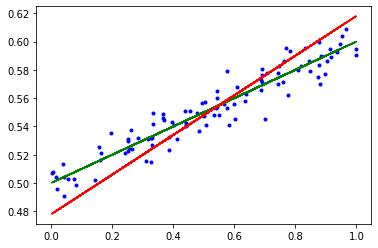

In [10]:
%matplotlib inline
plt.plot(x, y, 'b.')
plt.plot(x, predict(x, w_true, b_true), 'g')
plt.plot(x, predict(x, w_guess, b_guess), 'r')

----